# Observation of Kerr effect 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We use finite element method to solve this equation numerically, so in order to verify the numerical solution, we compare the solution with analytic solution :



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Import parameters from python
parameter = np.loadtxt("../results/Kerr/parameter_kerr.txt")
Pcr = parameter[0]
k = parameter[1]
K = parameter[2]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])
w0 = parameter[8]
p = parameter[9]
n2 = parameter[10]

# Finding the collapse point

The collapse points must follow this formula:
\begin{equation}
    z_c = \frac{0.367z_R}{\sqrt{\left(\sqrt{P_{in}/P_{cr}} - 0.852\right)^2 - 0.0219}}
\end{equation}

In [3]:
#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


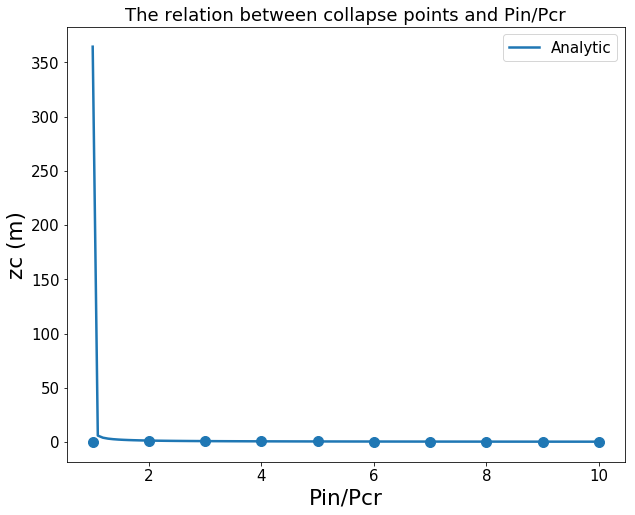

In [4]:
point_div = np.loadtxt("../results/Kerr/divergence_kerr.txt") #collapse point created by codes

#analytical function
zR = k*w0**2/2
def analytic_zc(p):
    return 0.367*zR/((p**(1/2) - 0.852)**2 - 0.0219)**(1/2)

fig, ax = plt.subplots()
x = np.linspace(1, 10, 100)
#print(x)
#print(point_div)
p = np.linspace(1, 10, 10)
ax.scatter(p, point_div)
ax.plot(x, analytic_zc(x), label = 'Analytic')
ax.set_xlabel('Pin/Pcr')
ax.set_ylabel('zc (m)')
ax.title.set_text('The relation between collapse points and Pin/Pcr')
ax.legend()
#plt.ylim(4.5, 5.5)
fig.show()

I set by default that if we can't find inf the valWe see that when Pin/Pcr = 1 there are no collapse point (or this point is very far away), so we can delete it from this graph. 

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


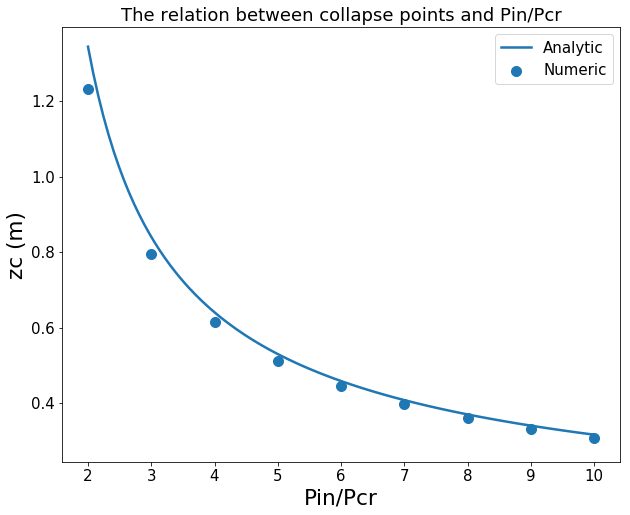

In [5]:
point_div2 = []
for i in range(len(point_div) -1):
    point_div2.append(point_div[i+1])
point_div2 = np.asarray(point_div2)

fig, ax = plt.subplots()
x = np.linspace(2, 10, 100)
p = np.linspace(2,10,9)
ax.scatter(p, point_div2, label = 'Numeric')
ax.plot(x, analytic_zc(x), label = 'Analytic')
ax.set_xlabel('Pin/Pcr')
ax.set_ylabel('zc (m)')
ax.legend()
ax.title.set_text('The relation between collapse points and Pin/Pcr')
#plt.ylim(4.5, 5.5)
fig.show()

# save figure as pdf
plt.savefig("../figures/collapse_points_kerr.jpg")